In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd 'drive/My Drive/'

[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#silencing warnings that are unnecessary
try:
    import warnings
    warnings.filterwarnings('ignore')
except:
    pass

In [ ]:
df = pd.read_csv('National_Health_Interview_Survey__NHIS__-_National_Cardiovascular_Disease_Surveillance_Data (1).csv')
df

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2000,US,United States,NHIS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),5.9,5.9,NaN,NaN,5.6,6.3,Gender,Female,C1,T1,NS001,Crude,BOC02,GEN02,59,NaN
1,2000,WEST,West,NHIS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.7,6.7,NaN,NaN,6.0,7.3,Race,Non-Hispanic White,C1,T1,NS001,AgeStdz,BOC04,RAC01,9004,NaN
2,2006,NRE,Northeast,NHIS,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.9,4.9,NaN,NaN,3.5,6.6,Age,45-64,C1,T4,NS002,Crude,BOC03,AGE05,9001,NaN
3,2004,US,United States,NHIS,None,None,Healthy People 2020,None,Risk Factors,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,Percent (%),40.1,40.1,NaN,NaN,39.0,41.3,Age,35+,C2,T14,NS011,Crude,BOC03,AGE07,59,NaN
4,2004,NRE,Northeast,NHIS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),11.5,11.5,NaN,NaN,10.6,12.4,Age,35+,C1,T1,NS001,Crude,BOC03,AGE07,9001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,2015,NRE,Northeast,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Gender,Female,C2,T9,NS013,AgeStdz,BOC02,GEN02,9001,NaN
15836,2010,WEST,West,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Race,Non-Hispanic White,C2,T9,NS013,AgeStdz,BOC04,RAC01,9004,NaN
15837,2016,WEST,West,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Gender,Male,C2,T9,NS013,AgeStdz,BOC02,GEN01,9004,NaN
15838,2009,SOU,South,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Race,Non-Hispanic White,C2,T9,NS013,AgeStdz,BOC04,RAC01,9003,NaN



The dataset above shows a summary of populations per location, each row does not refer to a specific person.



Data is split into two datasets, Risk Factors and Cardiovascular Diseases.

In [ ]:

df_cardio_grouped = df.groupby(df.CategoryId)
df_cardio = df_cardio_grouped.get_group("C1")
df_risk = df_cardio_grouped.get_group("C2")
df_cardio


,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2000,US,United States,NHIS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),5.9,5.9,NaN,NaN,5.6,6.3,Gender,Female,C1,T1,NS001,Crude,BOC02,GEN02,59,NaN
1,2000,WEST,West,NHIS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.7,6.7,NaN,NaN,6.0,7.3,Race,Non-Hispanic White,C1,T1,NS001,AgeStdz,BOC04,RAC01,9004,NaN
2,2006,NRE,Northeast,NHIS,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.9,4.9,NaN,NaN,3.5,6.6,Age,45-64,C1,T4,NS002,Crude,BOC03,AGE05,9001,NaN
4,2004,NRE,Northeast,NHIS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),11.5,11.5,NaN,NaN,10.6,12.4,Age,35+,C1,T1,NS001,Crude,BOC03,AGE07,9001,NaN
6,2013,MDW,Midwest,NHIS,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.9,2.9,NaN,NaN,2.2,3.9,Age,45-64,C1,T6,NS004,Crude,BOC03,AGE05,9002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14824,2008,WEST,West,NHIS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.0,6.0,NaN,NaN,5.1,6.9,Gender,Female,C1,T1,NS001,AgeStdz,BOC02,GEN02,9004,NaN
14825,2014,NRE,Northeast,NHIS,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.2,2.2,NaN,NaN,1.2,3.8,Race,Hispanic,C1,T6,NS004,Crude,BOC04,RAC04,9001,NaN
14826,2013,SOU,South,NHIS,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,-2.0,*,Statistically unstable estimates not presented...,NaN,NaN,Age,18-24,C1,T6,NS004,Crude,BOC03,AGE01,9003,NaN
14827,2007,US,United States,NHIS,Million Hearts,None,None,None,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),5.8,5.8,NaN,NaN,3.2,10.2,Race,Other,C1,T3,NS003,AgeStdz,BOC04,RAC07,59,NaN


#Data Cleaning and Processing
We dropped DataSource because it only has one datasource in all of the columns. The other columns, such as Category and CategoryID, is not needed anymore because the name of the variable for the dataset describes the category.

In [ ]:
df_cardio.drop(['Category', 'DataSource', 'Data_Value_Alt', 'GeoLocation', 'CategoryId', 'PriorityArea1', 'PriorityArea2', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PriorityArea3', 'PriorityArea4', 'LowConfidenceLimit', 'HighConfidenceLimit'], axis=1, inplace=True)

In [ ]:
df_cardio.describe()

,Year,Data_Value,LocationID
count,7920.000000,6292.000000,7920.000000
mean,2008.500000,5.720757,7213.800000
std,5.188455,5.236584,3577.626007
min,2000.000000,0.000000,59.000000
25%,2004.000000,2.600000,9001.000000
50%,2008.500000,4.000000,9002.000000
75%,2013.000000,7.300000,9003.000000
max,2017.000000,37.500000,9004.000000


The table above shows that the dataset starts from the year 2000 and ends at 2017 and the average year is 2008 while the 75% quartile is 2013.

In [ ]:
df_cardio


,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
0,2000,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),5.9,Gender,Female,T1,NS001,Crude,BOC02,GEN02,59
1,2000,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.7,Race,Non-Hispanic White,T1,NS001,AgeStdz,BOC04,RAC01,9004
2,2006,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.9,Age,45-64,T4,NS002,Crude,BOC03,AGE05,9001
4,2004,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),11.5,Age,35+,T1,NS001,Crude,BOC03,AGE07,9001
6,2013,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.9,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14824,2008,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.0,Gender,Female,T1,NS001,AgeStdz,BOC02,GEN02,9004
14825,2014,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.2,Race,Hispanic,T6,NS004,Crude,BOC04,RAC04,9001
14826,2013,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,18-24,T6,NS004,Crude,BOC03,AGE01,9003
14827,2007,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),5.8,Race,Other,T3,NS003,AgeStdz,BOC04,RAC07,59


In [ ]:
df.dtypes

Year                            int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
PriorityArea1                  object
PriorityArea2                  object
PriorityArea3                  object
PriorityArea4                  object
Category                       object
Topic                          object
Indicator                      object
Data_Value_Type                object
Data_Value_Unit                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
LowConfidenceLimit            float64
HighConfidenceLimit           float64
Break_Out_Category             object
Break_Out                      object
CategoryId                     object
TopicId                        object
IndicatorID                    object
Data_Value_TypeID              object
BreakOutCategoryId             object
BreakOutId  

The data is grouped by topic, and it shows each topic has about 1,980 rows for the Cardio dataset.

In [ ]:
df_cardio.groupby(by='Topic').agg('count')

,Year,LocationAbbr,LocationDesc,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
Topic,,,,,,,,,,,,,,,
Acute Myocardial Infarction (Heart Attack),1980,1980,1980,1980,1980,1980,1503,1980,1980,1980,1980,1980,1980,1980,1980
Coronary Heart Disease,1980,1980,1980,1980,1980,1980,1559,1980,1980,1980,1980,1980,1980,1980,1980
Major Cardiovascular Disease,1980,1980,1980,1980,1980,1980,1716,1980,1980,1980,1980,1980,1980,1980,1980
Stroke,1980,1980,1980,1980,1980,1980,1514,1980,1980,1980,1980,1980,1980,1980,1980


The data is grouped by break out category, and it shows Race and Gender has many rows than Age Groups.

In [ ]:
df_cardio.groupby(by='Break_Out').agg('count')

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
Break_Out,,,,,,,,,,,,,,,
18-24,360,360,360,360,360,360,360,98,360,360,360,360,360,360,360
25-44,360,360,360,360,360,360,360,216,360,360,360,360,360,360,360
35+,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360
45-64,360,360,360,360,360,360,360,359,360,360,360,360,360,360,360
65+,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360
75+,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360
Female,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720
Hispanic,720,720,720,720,720,720,720,569,720,720,720,720,720,720,720
Male,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720


In [ ]:
df_cardio.shape

(7920, 16)

In [ ]:
df_cardio.count(0)

Year                  7920
LocationAbbr          7920
LocationDesc          7920
Topic                 7920
Indicator             7920
Data_Value_Type       7920
Data_Value_Unit       7920
Data_Value            6292
Break_Out_Category    7920
Break_Out             7920
TopicId               7920
IndicatorID           7920
Data_Value_TypeID     7920
BreakOutCategoryId    7920
BreakOutId            7920
LocationID            7920
dtype: int64

In [ ]:
df_risk

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
3,2004,US,United States,NHIS,None,None,Healthy People 2020,None,Risk Factors,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,Percent (%),40.1,40.1,NaN,NaN,39.0,41.3,Age,35+,C2,T14,NS011,Crude,BOC03,AGE07,59,NaN
5,2013,US,United States,NHIS,None,None,Healthy People 2020,None,Risk Factors,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,Percent (%),22.7,22.7,NaN,NaN,20.7,24.8,Age,18-24,C2,T14,NS011,Crude,BOC03,AGE01,59,NaN
7,2017,SOU,South,NHIS,None,ABCS,None,None,Risk Factors,Smoking,Prevalence of current smoking among US adults ...,Crude,Percent (%),18.2,18.2,NaN,NaN,16.6,19.8,Gender,Male,C2,T15,NS010,Crude,BOC02,GEN01,9003,NaN
9,2006,SOU,South,NHIS,None,ABCS,None,None,Risk Factors,Smoking,Prevalence of current smoking among US adults ...,Crude,Percent (%),22.8,22.8,NaN,NaN,20.9,24.9,Age,45-64,C2,T15,NS010,Crude,BOC03,AGE05,9003,NaN
11,2011,WEST,West,NHIS,None,ABCS,None,None,Risk Factors,Smoking,Prevalence of current smoking among US adults ...,Crude,Percent (%),16.7,16.7,NaN,NaN,15.1,18.5,Age,45-64,C2,T15,NS010,Crude,BOC03,AGE05,9004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,2015,NRE,Northeast,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Gender,Female,C2,T9,NS013,AgeStdz,BOC02,GEN02,9001,NaN
15836,2010,WEST,West,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Race,Non-Hispanic White,C2,T9,NS013,AgeStdz,BOC04,RAC01,9004,NaN
15837,2016,WEST,West,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Gender,Male,C2,T9,NS013,AgeStdz,BOC02,GEN01,9004,NaN
15838,2009,SOU,South,NHIS,None,None,None,None,Risk Factors,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,Percent (%),NaN,-1.0,-,Data not available,NaN,NaN,Race,Non-Hispanic White,C2,T9,NS013,AgeStdz,BOC04,RAC01,9003,NaN


#Data Cleaning and Processing
We dropped DataSource because it only has one datasource in all of the columns. The other columns, such as Category and CategoryID, is not needed anymore because the name of the variable for the dataset describes the category.

In [ ]:
df_risk.drop(['Category', 'DataSource', 'Data_Value_Alt', 'Data_Value_Unit', 'GeoLocation', 'CategoryId', 'PriorityArea1', 'PriorityArea2', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Year', 'PriorityArea3', 'PriorityArea4', 'LowConfidenceLimit', 'HighConfidenceLimit'], axis=1, inplace=True)

In [ ]:
df_risk

,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
3,US,United States,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,40.1,Age,35+,T14,NS011,Crude,BOC03,AGE07,59
5,US,United States,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,22.7,Age,18-24,T14,NS011,Crude,BOC03,AGE01,59
7,SOU,South,Smoking,Prevalence of current smoking among US adults ...,Crude,18.2,Gender,Male,T15,NS010,Crude,BOC02,GEN01,9003
9,SOU,South,Smoking,Prevalence of current smoking among US adults ...,Crude,22.8,Age,45-64,T15,NS010,Crude,BOC03,AGE05,9003
11,WEST,West,Smoking,Prevalence of current smoking among US adults ...,Crude,16.7,Age,45-64,T15,NS010,Crude,BOC03,AGE05,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,NRE,Northeast,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Gender,Female,T9,NS013,AgeStdz,BOC02,GEN02,9001
15836,WEST,West,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Race,Non-Hispanic White,T9,NS013,AgeStdz,BOC04,RAC01,9004
15837,WEST,West,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Gender,Male,T9,NS013,AgeStdz,BOC02,GEN01,9004
15838,SOU,South,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Race,Non-Hispanic White,T9,NS013,AgeStdz,BOC04,RAC01,9003


In [ ]:
risktopic_count = df_risk.groupby(by='Topic').agg('count')
cardiotopic_count = df_cardio.groupby(by='Topic').agg('count')


In [ ]:
risktopic_count

,LocationAbbr,LocationDesc,Indicator,Data_Value_Type,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
Topic,,,,,,,,,,,,,
Hypertension,3960,3960,3960,3960,648,3960,3960,3960,3960,3960,3960,3960,3960
Physical Inactivity,1980,1980,1980,1980,1947,1980,1980,1980,1980,1980,1980,1980,1980
Smoking,1980,1980,1980,1980,1933,1980,1980,1980,1980,1980,1980,1980,1980


In this table, you can see that there are more rows for Hypertension than Physical Inactivity and Smoking, except for the column Data Value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f241554df90>]],
      dtype=object)

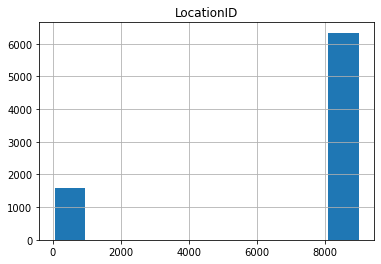

In [ ]:
df_risk.hist('LocationID')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24152ece90>]],
      dtype=object)

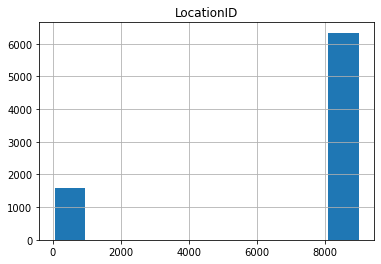

In [ ]:
df_cardio.hist('LocationID')

You can see for both histograms, more locations ids are in the range of 8000 and plus.

In this section, I am dividing the datasets into other datasets based on the topic.

In [ ]:
mcd = df_cardio[df_cardio.Topic == 'Major Cardiovascular Disease']
mcd

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
0,2000,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),5.9,Gender,Female,T1,NS001,Crude,BOC02,GEN02,59
1,2000,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.7,Race,Non-Hispanic White,T1,NS001,AgeStdz,BOC04,RAC01,9004
4,2004,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),11.5,Age,35+,T1,NS001,Crude,BOC03,AGE07,9001
10,2010,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),2.9,Age,25-44,T1,NS001,Crude,BOC03,AGE04,9003
16,2015,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),9.6,Gender,Male,T1,NS001,Crude,BOC02,GEN01,9003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14803,2000,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),7.3,Race,Non-Hispanic White,T1,NS001,Crude,BOC04,RAC01,9004
14813,2009,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),9.8,Gender,Male,T1,NS001,Crude,BOC02,GEN01,9001
14815,2012,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),22.5,Age,65+,T1,NS001,Crude,BOC03,AGE06,9004
14816,2017,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),7.2,Overall,Overall,T1,NS001,AgeStdz,BOC01,OVR01,59


In [ ]:
chd = df_cardio[df_cardio.Topic == 'Coronary Heart Disease']
chd

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
2,2006,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.9,Age,45-64,T4,NS002,Crude,BOC03,AGE05,9001
28,2012,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.0,Race,Non-Hispanic Black,T4,NS002,Crude,BOC04,RAC02,9004
35,2017,US,United States,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),5.1,Race,Non-Hispanic White,T4,NS002,Crude,BOC04,RAC01,59
48,2008,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),6.9,Age,35+,T4,NS002,Crude,BOC03,AGE07,9003
53,2002,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.7,Age,35+,T4,NS002,Crude,BOC03,AGE07,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14791,2017,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),3.6,Race,Non-Hispanic Black,T4,NS002,Crude,BOC04,RAC02,9003
14800,2005,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Age-Standardized,Percent (%),NaN,Race,Other,T4,NS002,AgeStdz,BOC04,RAC07,9001
14806,2003,US,United States,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),3.8,Age,45-64,T4,NS002,Crude,BOC03,AGE05,59
14811,2000,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),NaN,Race,Other,T4,NS002,Crude,BOC04,RAC07,9001


In [ ]:
stroke = df_cardio[df_cardio.Topic == 'Stroke']
stroke

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
6,2013,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.9,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9002
8,2007,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),0.0,Age,18-24,T6,NS004,Crude,BOC03,AGE01,9002
17,2015,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.5,Race,Non-Hispanic Black,T6,NS004,Crude,BOC04,RAC02,59
23,2008,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.3,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9002
27,2005,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.0,Gender,Female,T6,NS004,Crude,BOC02,GEN02,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792,2008,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),3.2,Overall,Overall,T6,NS004,AgeStdz,BOC01,OVR01,9003
14809,2009,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),2.4,Gender,Male,T6,NS004,AgeStdz,BOC02,GEN01,59
14825,2014,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.2,Race,Hispanic,T6,NS004,Crude,BOC04,RAC04,9001
14826,2013,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,18-24,T6,NS004,Crude,BOC03,AGE01,9003


In [ ]:
heartattack = df_cardio[df_cardio.Topic == 'Acute Myocardial Infarction (Heart Attack)']
heartattack

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
32,2008,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),2.4,Gender,Female,T3,NS003,Crude,BOC02,GEN02,9002
40,2000,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.2,Gender,Male,T3,NS003,Crude,BOC02,GEN01,59
62,2005,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.7,Age,25-44,T3,NS003,Crude,BOC03,AGE04,9001
74,2000,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.0,Race,Non-Hispanic Asian,T3,NS003,Crude,BOC04,RAC03,9003
122,2001,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.9,Gender,Male,T3,NS003,Crude,BOC02,GEN01,9001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,2014,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),9.2,Age,75+,T3,NS003,Crude,BOC03,AGE08,9002
14801,2001,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),10.5,Race,Other,T3,NS003,AgeStdz,BOC04,RAC07,9003
14810,2006,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),2.8,Race,Non-Hispanic Black,T3,NS003,Crude,BOC04,RAC02,59
14820,2015,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),NaN,Race,Non-Hispanic Asian,T3,NS003,AgeStdz,BOC04,RAC03,9001


In [ ]:
T5 = df_cardio[df_cardio.TopicId == 'T5']
T5

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID


In [ ]:
T2 = df_cardio[df_cardio.TopicId == 'T2']
T2

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID


In [ ]:
mcd_gender = mcd[mcd.Break_Out_Category == 'Gender']
mcd_gender

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
0,2000,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),5.9,Gender,Female,T1,NS001,Crude,BOC02,GEN02,59
16,2015,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),9.6,Gender,Male,T1,NS001,Crude,BOC02,GEN01,9003
26,2009,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),5.6,Gender,Female,T1,NS001,Crude,BOC02,GEN02,9004
126,2004,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),7.4,Gender,Female,T1,NS001,Crude,BOC02,GEN02,9003
128,2001,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.4,Gender,Female,T1,NS001,AgeStdz,BOC02,GEN02,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,2002,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),8.6,Gender,Male,T1,NS001,Crude,BOC02,GEN01,59
14786,2006,MDW,Midwest,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),8.0,Gender,Female,T1,NS001,AgeStdz,BOC02,GEN02,9002
14798,2008,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),9.3,Gender,Male,T1,NS001,Crude,BOC02,GEN01,59
14813,2009,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),9.8,Gender,Male,T1,NS001,Crude,BOC02,GEN01,9001


In [ ]:
chd_gender = chd[chd.Break_Out_Category == 'Gender']
chd_gender

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
70,2015,MDW,Midwest,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),3.9,Gender,Female,T4,NS002,Crude,BOC02,GEN02,9002
98,2010,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),3.6,Gender,Female,T4,NS002,Crude,BOC02,GEN02,9003
187,2003,MDW,Midwest,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),2.4,Gender,Female,T4,NS002,Crude,BOC02,GEN02,9002
206,2012,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),6.9,Gender,Male,T4,NS002,Crude,BOC02,GEN01,9003
223,2016,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.0,Gender,Male,T4,NS002,Crude,BOC02,GEN01,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,2013,MDW,Midwest,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),6.9,Gender,Male,T4,NS002,Crude,BOC02,GEN01,9002
14610,2014,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Age-Standardized,Percent (%),5.5,Gender,Male,T4,NS002,AgeStdz,BOC02,GEN01,9003
14673,2009,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),2.9,Gender,Female,T4,NS002,Crude,BOC02,GEN02,9001
14676,2008,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),6.2,Gender,Male,T4,NS002,Crude,BOC02,GEN01,9003


For each topic, we are splitting the dataset based on category.

In [ ]:
stroke_gender = stroke[stroke.Break_Out_Category == 'Gender']
stroke_gender

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
27,2005,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.0,Gender,Female,T6,NS004,Crude,BOC02,GEN02,9004
60,2016,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),2.7,Gender,Male,T6,NS004,AgeStdz,BOC02,GEN01,9004
65,2001,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.4,Gender,Female,T6,NS004,Crude,BOC02,GEN02,9003
96,2009,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.3,Gender,Male,T6,NS004,Crude,BOC02,GEN01,9001
97,2012,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),1.9,Gender,Male,T6,NS004,AgeStdz,BOC02,GEN01,9001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,2001,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),2.9,Gender,Male,T6,NS004,AgeStdz,BOC02,GEN01,9003
14691,2004,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.8,Gender,Male,T6,NS004,Crude,BOC02,GEN01,9001
14700,2001,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),2.5,Gender,Male,T6,NS004,AgeStdz,BOC02,GEN01,9004
14718,2006,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.0,Gender,Male,T6,NS004,Crude,BOC02,GEN01,9003


In [ ]:
heartattack_gender = heartattack[heartattack.Break_Out_Category == 'Gender']
heartattack_gender

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
32,2008,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),2.4,Gender,Female,T3,NS003,Crude,BOC02,GEN02,9002
40,2000,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.2,Gender,Male,T3,NS003,Crude,BOC02,GEN01,59
122,2001,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.9,Gender,Male,T3,NS003,Crude,BOC02,GEN01,9001
130,2003,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),2.4,Gender,Female,T3,NS003,AgeStdz,BOC02,GEN02,9003
273,2001,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),2.3,Gender,Female,T3,NS003,AgeStdz,BOC02,GEN02,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,2007,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),2.1,Gender,Female,T3,NS003,AgeStdz,BOC02,GEN02,59
14416,2013,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),2.3,Gender,Female,T3,NS003,Crude,BOC02,GEN02,9001
14532,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),1.8,Gender,Female,T3,NS003,AgeStdz,BOC02,GEN02,59
14544,2008,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),2.1,Gender,Female,T3,NS003,Crude,BOC02,GEN02,9001


In [ ]:
type(chd_gender)

pandas.core.frame.DataFrame

In [ ]:
heartattack_age = heartattack[heartattack.Break_Out_Category == 'Age']
heartattack_age

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
62,2005,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.7,Age,25-44,T3,NS003,Crude,BOC03,AGE04,9001
153,2002,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.0,Age,18-24,T3,NS003,Crude,BOC03,AGE01,9002
154,2003,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),10.6,Age,65+,T3,NS003,Crude,BOC03,AGE06,9002
156,2015,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.0,Age,18-24,T3,NS003,Crude,BOC03,AGE01,9002
183,2002,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.6,Age,35+,T3,NS003,Crude,BOC03,AGE07,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14735,2014,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),12.5,Age,75+,T3,NS003,Crude,BOC03,AGE08,9001
14748,2009,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),16.7,Age,75+,T3,NS003,Crude,BOC03,AGE08,9003
14751,2004,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.0,Age,18-24,T3,NS003,Crude,BOC03,AGE01,9002
14794,2009,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.8,Age,35+,T3,NS003,Crude,BOC03,AGE07,59


In [ ]:
heartattack_us_age_year = heartattack_age[heartattack_age.Year == 2017]
heartattack_us_age_year

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
278,2017,WEST,West,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.0,Age,18-24,T3,NS003,Crude,BOC03,AGE01,9004
288,2017,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),10.1,Age,75+,T3,NS003,Crude,BOC03,AGE08,9001
533,2017,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),12.0,Age,75+,T3,NS003,Crude,BOC03,AGE08,9003
750,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),3.5,Age,45-64,T3,NS003,Crude,BOC03,AGE05,59
758,2017,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),13.8,Age,75+,T3,NS003,Crude,BOC03,AGE08,9002
1676,2017,WEST,West,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),6.4,Age,65+,T3,NS003,Crude,BOC03,AGE06,9004
1798,2017,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),3.1,Age,45-64,T3,NS003,Crude,BOC03,AGE05,9001
1800,2017,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.0,Age,18-24,T3,NS003,Crude,BOC03,AGE01,9001
2582,2017,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),3.6,Age,45-64,T3,NS003,Crude,BOC03,AGE05,9002
3138,2017,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.5,Age,25-44,T3,NS003,Crude,BOC03,AGE04,9003


In [ ]:
heartattack_us = heartattack_us_age_year[heartattack_us_age_year.LocationAbbr == 'US']
heartattack_us

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
750,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),3.5,Age,45-64,T3,NS003,Crude,BOC03,AGE05,59
3800,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.4,Age,25-44,T3,NS003,Crude,BOC03,AGE04,59
6730,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),NaN,Age,18-24,T3,NS003,Crude,BOC03,AGE01,59
9203,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),11.1,Age,75+,T3,NS003,Crude,BOC03,AGE08,59
12436,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),8.8,Age,65+,T3,NS003,Crude,BOC03,AGE06,59
13083,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.3,Age,35+,T3,NS003,Crude,BOC03,AGE07,59


Above, we just grabbed the dataset that has only 2017 and is in the US. We also reindexed the dataset for organizational purposes.

In [ ]:
heartbreak_setindex = heartattack_us.set_index('Break_Out')
heartbreak_reindex = heartbreak_setindex.reindex(['18-24', '25-44', '35+', '45-64', '65+', '75+'])
heartbreak_reindex

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
Break_Out,,,,,,,,,,,,,,,
18-24,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),NaN,Age,T3,NS003,Crude,BOC03,AGE01,59
25-44,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.4,Age,T3,NS003,Crude,BOC03,AGE04,59
35+,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),4.3,Age,T3,NS003,Crude,BOC03,AGE07,59
45-64,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),3.5,Age,T3,NS003,Crude,BOC03,AGE05,59
65+,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),8.8,Age,T3,NS003,Crude,BOC03,AGE06,59
75+,2017,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),11.1,Age,T3,NS003,Crude,BOC03,AGE08,59


We can see that for heart attacks in the year of 2017 and in the region of the US, the percentage of data value becomes higher as people get older. Data value means % of certain demographic in the dataset.

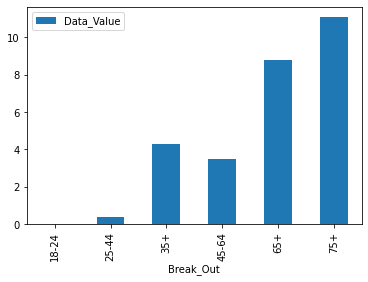

In [ ]:
heartbreak_reindex.plot.bar(y='Data_Value')

In [ ]:
stroke_age = stroke[stroke.Break_Out_Category == 'Age']
stroke_age

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
6,2013,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.9,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9002
8,2007,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),0.0,Age,18-24,T6,NS004,Crude,BOC03,AGE01,9002
23,2008,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.3,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9002
29,2000,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),12.8,Age,75+,T6,NS004,Crude,BOC03,AGE08,9003
89,2003,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),8.4,Age,65+,T6,NS004,Crude,BOC03,AGE06,9002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14733,2007,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,25-44,T6,NS004,Crude,BOC03,AGE04,9001
14745,2013,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.9,Age,35+,T6,NS004,Crude,BOC03,AGE07,9002
14758,2009,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),1.1,Age,25-44,T6,NS004,Crude,BOC03,AGE04,9003
14789,2008,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),4.6,Age,35+,T6,NS004,Crude,BOC03,AGE07,9003


In [ ]:
stroke_us_age_year = stroke_age[stroke_age.Year == 2017]
stroke_us_age_year

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
179,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.3,Age,45-64,T6,NS004,Crude,BOC03,AGE05,59
662,2017,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),4.8,Age,35+,T6,NS004,Crude,BOC03,AGE07,9003
676,2017,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,25-44,T6,NS004,Crude,BOC03,AGE04,9004
938,2017,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),8.9,Age,65+,T6,NS004,Crude,BOC03,AGE06,9003
1480,2017,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,25-44,T6,NS004,Crude,BOC03,AGE04,9001
2353,2017,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.7,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9002
3423,2017,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),13.3,Age,75+,T6,NS004,Crude,BOC03,AGE08,9004
3680,2017,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,18-24,T6,NS004,Crude,BOC03,AGE01,9003
4540,2017,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.5,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9004
4699,2017,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.4,Age,35+,T6,NS004,Crude,BOC03,AGE07,9001


In [ ]:
stroke_us = stroke_us_age_year[stroke_us_age_year.LocationAbbr == 'US']
stroke_us

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
179,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.3,Age,45-64,T6,NS004,Crude,BOC03,AGE05,59
5994,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),12.0,Age,75+,T6,NS004,Crude,BOC03,AGE08,59
6959,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),0.8,Age,25-44,T6,NS004,Crude,BOC03,AGE04,59
9039,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),4.3,Age,35+,T6,NS004,Crude,BOC03,AGE07,59
11895,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,18-24,T6,NS004,Crude,BOC03,AGE01,59
13851,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),8.7,Age,65+,T6,NS004,Crude,BOC03,AGE06,59


In [ ]:
stroke_setindex = stroke_us.set_index('Break_Out')
stroke_reindex = stroke_setindex.reindex(['18-24', '25-44', '35+', '45-64', '65+', '75+'])
stroke_reindex

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
Break_Out,,,,,,,,,,,,,,,
18-24,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),NaN,Age,T6,NS004,Crude,BOC03,AGE01,59
25-44,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),0.8,Age,T6,NS004,Crude,BOC03,AGE04,59
35+,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),4.3,Age,T6,NS004,Crude,BOC03,AGE07,59
45-64,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.3,Age,T6,NS004,Crude,BOC03,AGE05,59
65+,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),8.7,Age,T6,NS004,Crude,BOC03,AGE06,59
75+,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),12.0,Age,T6,NS004,Crude,BOC03,AGE08,59


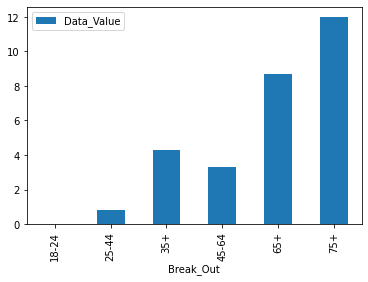

In [ ]:
stroke_reindex.plot.bar(y='Data_Value')

We can see here that the plot here seems very similar to the plot for heart attack and age.

In [ ]:
mcd_age = mcd[mcd.Break_Out_Category == 'Age']
mcd_age

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
4,2004,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),11.5,Age,35+,T1,NS001,Crude,BOC03,AGE07,9001
10,2010,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),2.9,Age,25-44,T1,NS001,Crude,BOC03,AGE04,9003
19,2016,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),1.7,Age,25-44,T1,NS001,Crude,BOC03,AGE04,9004
20,2017,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),1.1,Age,25-44,T1,NS001,Crude,BOC03,AGE04,9001
45,2004,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),NaN,Age,18-24,T1,NS001,Crude,BOC03,AGE01,9001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14678,2006,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),0.9,Age,25-44,T1,NS001,Crude,BOC03,AGE04,9004
14703,2004,MDW,Midwest,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),1.6,Age,25-44,T1,NS001,Crude,BOC03,AGE04,9002
14706,2009,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),9.4,Age,35+,T1,NS001,Crude,BOC03,AGE07,9004
14719,2016,MDW,Midwest,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),8.2,Age,45-64,T1,NS001,Crude,BOC03,AGE05,9002


In [ ]:
mcd_us_age_year = mcd_age[mcd_age.Year == 2017]
mcd_us = mcd_us_age_year[mcd_us_age_year.LocationAbbr == 'US']
mcd_setindex = mcd_us.set_index('Break_Out')
mcd_reindex = mcd_setindex.reindex(['18-24', '25-44', '35+', '45-64', '65+', '75+'])

The plot for Major Cardiovasular Disease and Age seems to be same as the other two plots.

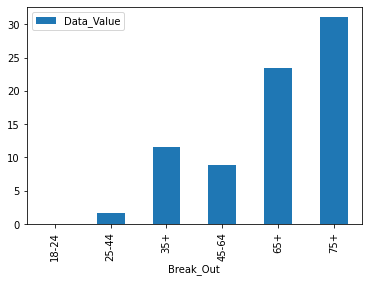

In [ ]:
mcd_reindex.plot.bar(y='Data_Value')

This is a scatter plot, which shows there are a lot of high percentage data values among the 65+ and 75+ category overall.

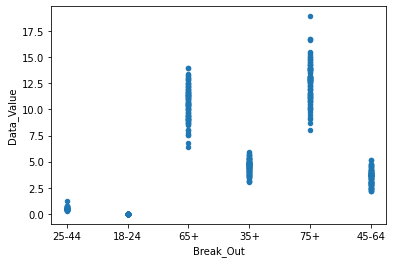

In [ ]:
plt = heartattack_age.plot.scatter(x="Break_Out", y="Data_Value")

In [ ]:
chd_age = chd[chd.Break_Out_Category == 'Age']
chd_age

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
2,2006,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.9,Age,45-64,T4,NS002,Crude,BOC03,AGE05,9001
48,2008,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),6.9,Age,35+,T4,NS002,Crude,BOC03,AGE07,9003
53,2002,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.7,Age,35+,T4,NS002,Crude,BOC03,AGE07,9004
55,2003,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),2.4,Age,45-64,T4,NS002,Crude,BOC03,AGE05,9004
63,2011,US,United States,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),0.5,Age,25-44,T4,NS002,Crude,BOC03,AGE04,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,2000,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),3.6,Age,45-64,T4,NS002,Crude,BOC03,AGE05,9004
14696,2015,MDW,Midwest,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),7.9,Age,35+,T4,NS002,Crude,BOC03,AGE07,9002
14701,2002,US,United States,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),14.8,Age,65+,T4,NS002,Crude,BOC03,AGE06,59
14785,2014,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.9,Age,45-64,T4,NS002,Crude,BOC03,AGE05,9003


In [ ]:
chd_race = chd[chd.Break_Out_Category == 'Race']
chd_race

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
28,2012,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.0,Race,Non-Hispanic Black,T4,NS002,Crude,BOC04,RAC02,9004
35,2017,US,United States,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),5.1,Race,Non-Hispanic White,T4,NS002,Crude,BOC04,RAC01,59
58,2008,US,United States,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.9,Race,Non-Hispanic White,T4,NS002,Crude,BOC04,RAC01,59
64,2011,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Age-Standardized,Percent (%),4.5,Race,Non-Hispanic White,T4,NS002,AgeStdz,BOC04,RAC01,9001
94,2016,MDW,Midwest,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Age-Standardized,Percent (%),4.2,Race,Non-Hispanic Black,T4,NS002,AgeStdz,BOC04,RAC02,9002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14757,2001,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),NaN,Race,Non-Hispanic Asian,T4,NS002,Crude,BOC04,RAC03,9004
14784,2008,WEST,West,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),4.0,Race,Non-Hispanic White,T4,NS002,Crude,BOC04,RAC01,9004
14791,2017,SOU,South,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,Percent (%),3.6,Race,Non-Hispanic Black,T4,NS002,Crude,BOC04,RAC02,9003
14800,2005,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Age-Standardized,Percent (%),NaN,Race,Other,T4,NS002,AgeStdz,BOC04,RAC07,9001


In [ ]:
mcd_race = mcd[mcd.Break_Out_Category == 'Race']
mcd_race

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
1,2000,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.7,Race,Non-Hispanic White,T1,NS001,AgeStdz,BOC04,RAC01,9004
37,2008,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),NaN,Race,Non-Hispanic Asian,T1,NS001,Crude,BOC04,RAC03,9003
87,2006,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),8.0,Race,Non-Hispanic Black,T1,NS001,Crude,BOC04,RAC02,9003
133,2017,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),6.4,Race,Non-Hispanic White,T1,NS001,AgeStdz,BOC04,RAC01,9004
144,2015,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),7.2,Race,Non-Hispanic Black,T1,NS001,AgeStdz,BOC04,RAC02,9001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14764,2009,SOU,South,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),9.4,Race,Non-Hispanic White,T1,NS001,AgeStdz,BOC04,RAC01,9003
14774,2003,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),8.2,Race,Non-Hispanic White,T1,NS001,Crude,BOC04,RAC01,9001
14787,2002,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),8.2,Race,Non-Hispanic White,T1,NS001,Crude,BOC04,RAC01,59
14790,2017,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),NaN,Race,Other,T1,NS001,Crude,BOC04,RAC07,9001


In [ ]:
stroke_race = stroke[stroke.Break_Out_Category == 'Race']
stroke_race

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
17,2015,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.5,Race,Non-Hispanic Black,T6,NS004,Crude,BOC04,RAC02,59
33,2011,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),4.2,Race,Non-Hispanic Black,T6,NS004,AgeStdz,BOC04,RAC02,9002
73,2000,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.9,Race,Non-Hispanic Black,T6,NS004,Crude,BOC04,RAC02,9002
78,2008,SOU,South,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),3.6,Race,Non-Hispanic Black,T6,NS004,AgeStdz,BOC04,RAC02,9003
102,2004,WEST,West,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.4,Race,Non-Hispanic White,T6,NS004,Crude,BOC04,RAC01,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14765,2017,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Age-Standardized,Percent (%),2.6,Race,Non-Hispanic White,T6,NS004,AgeStdz,BOC04,RAC01,59
14768,2007,US,United States,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.5,Race,Non-Hispanic White,T6,NS004,Crude,BOC04,RAC01,59
14781,2008,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),3.5,Race,Non-Hispanic Black,T6,NS004,Crude,BOC04,RAC02,9002
14825,2014,NRE,Northeast,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,Percent (%),2.2,Race,Hispanic,T6,NS004,Crude,BOC04,RAC04,9001


In [ ]:
heartattack_race = heartattack[heartattack.Break_Out_Category == 'Race']
heartattack_race

,Year,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
74,2000,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),0.0,Race,Non-Hispanic Asian,T3,NS003,Crude,BOC04,RAC03,9003
163,2013,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),NaN,Race,Non-Hispanic Asian,T3,NS003,AgeStdz,BOC04,RAC03,9001
170,2010,WEST,West,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),2.4,Race,Non-Hispanic Asian,T3,NS003,AgeStdz,BOC04,RAC03,9004
213,2005,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),2.8,Race,Non-Hispanic Black,T3,NS003,AgeStdz,BOC04,RAC02,59
228,2001,WEST,West,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),NaN,Race,Other,T3,NS003,AgeStdz,BOC04,RAC07,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,2009,MDW,Midwest,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),NaN,Race,Other,T3,NS003,AgeStdz,BOC04,RAC07,9002
14801,2001,SOU,South,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),10.5,Race,Other,T3,NS003,AgeStdz,BOC04,RAC07,9003
14810,2006,US,United States,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Crude,Percent (%),2.8,Race,Non-Hispanic Black,T3,NS003,Crude,BOC04,RAC02,59
14820,2015,NRE,Northeast,Acute Myocardial Infarction (Heart Attack),Prevalence of acute myocardial infarction (hea...,Age-Standardized,Percent (%),NaN,Race,Non-Hispanic Asian,T3,NS003,AgeStdz,BOC04,RAC03,9001


In this section, we see how many occurances are there per category per topic. We see that each topic has the same amount of categories.

In [ ]:

heartattack_gender_counts = heartattack_gender['Break_Out'].value_counts()
heartattack_gender_counts

Female    180
Male      180
Name: Break_Out, dtype: int64

In [ ]:


stroke_gender_counts = stroke_gender['Break_Out'].value_counts()
stroke_gender_counts

Female    180
Male      180
Name: Break_Out, dtype: int64

In [ ]:

chd_gender_counts = chd_gender['Break_Out'].value_counts()
chd_gender_counts

Female    180
Male      180
Name: Break_Out, dtype: int64

In [ ]:

mcd_gender_counts = mcd_gender['Break_Out'].value_counts()
mcd_gender_counts

Female    180
Male      180
Name: Break_Out, dtype: int64

In [ ]:
mcd_age_counts = mcd_age['Break_Out'].value_counts()
mcd_age_counts

75+      90
35+      90
65+      90
18-24    90
45-64    90
25-44    90
Name: Break_Out, dtype: int64

In [ ]:
chd_age_counts = chd_age['Break_Out'].value_counts()
chd_age_counts

75+      90
35+      90
65+      90
18-24    90
45-64    90
25-44    90
Name: Break_Out, dtype: int64

In [ ]:
stroke_age_counts = stroke_age['Break_Out'].value_counts()
stroke_age_counts

75+      90
35+      90
65+      90
18-24    90
45-64    90
25-44    90
Name: Break_Out, dtype: int64

In [ ]:
heartattack_age_counts = heartattack_age['Break_Out'].value_counts()
heartattack_age_counts

75+      90
35+      90
65+      90
18-24    90
45-64    90
25-44    90
Name: Break_Out, dtype: int64

In [ ]:
heartattack_race_counts = heartattack_race['Break_Out'].value_counts()
heartattack_race_counts

Hispanic              180
Non-Hispanic White    180
Other                 180
Non-Hispanic Asian    180
Non-Hispanic Black    180
Name: Break_Out, dtype: int64

In [ ]:
stroke_race_counts = stroke_race['Break_Out'].value_counts()
stroke_race_counts

Hispanic              180
Non-Hispanic White    180
Other                 180
Non-Hispanic Asian    180
Non-Hispanic Black    180
Name: Break_Out, dtype: int64

In [ ]:
mcd_race_counts = mcd_race['Break_Out'].value_counts()
mcd_race_counts

Hispanic              180
Non-Hispanic White    180
Other                 180
Non-Hispanic Asian    180
Non-Hispanic Black    180
Name: Break_Out, dtype: int64

In [ ]:
chd_race_counts = chd_race['Break_Out'].value_counts()
chd_race_counts

Hispanic              180
Non-Hispanic White    180
Other                 180
Non-Hispanic Asian    180
Non-Hispanic Black    180
Name: Break_Out, dtype: int64

In [ ]:
heartattack_counts = heartattack['Break_Out_Category'].value_counts()
heartattack_counts

Race       900
Age        540
Gender     360
Overall    180
Name: Break_Out_Category, dtype: int64

In [ ]:
stroke_counts = stroke['Break_Out_Category'].value_counts()
stroke_counts

Race       900
Age        540
Gender     360
Overall    180
Name: Break_Out_Category, dtype: int64

In [ ]:
chd_counts = chd['Break_Out_Category'].value_counts()
chd_counts

Race       900
Age        540
Gender     360
Overall    180
Name: Break_Out_Category, dtype: int64

In [ ]:
mcd_counts = mcd['Break_Out_Category'].value_counts()
mcd_counts

Race       900
Age        540
Gender     360
Overall    180
Name: Break_Out_Category, dtype: int64

In this line graph, we can see that there is a lot of values of race for heart attack dataset. This can also be said for the other topics  since the number of the counts for each topic is the same.

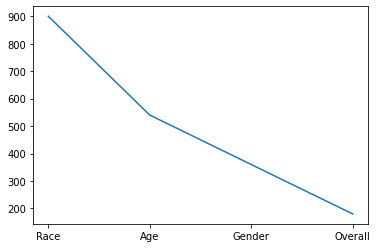

In [ ]:
number_of_categories_plot = plt.plot(heartattack_counts)

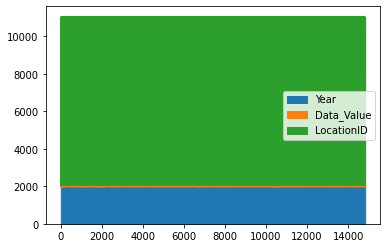

In [ ]:
df_cardio.plot.area()

In this area plot, we can see in the cardio dataset, the trend for all variables stay the same.